# TP5

In [1]:
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('lausanne-appart.xlsx')

X = data.iloc[:, 0:2].values.reshape((-1,2))
Y = data.iloc[:, 2].values

temp_X = np.ones((X.shape[0],X.shape[1]+1))
temp_X[:,1:] = X
X = temp_X

In [3]:
def hypotesis(theta,X):
    return np.dot(theta, X)

def gradientDescent(X,y,learning_rate,num_epoch, verbose=False):
    N = X.shape[0] # number of samples
    D = X.shape[1] # numbre of dimension
    theta = np.ones(D) # init theta
    X_trans = X.transpose() 
    for i in range(num_epoch):
        h = hypotesis(theta,X_trans)
        
        loss = h-y # best way to do it ?
    
        gradient = X_trans.dot(loss)*(1.0/N)        
        theta = theta - learning_rate * (1.0/N) * gradient
    return theta

In [4]:
theta = gradientDescent(X,Y,learning_rate=0.01,num_epoch=100)

avant la normalisation des axes

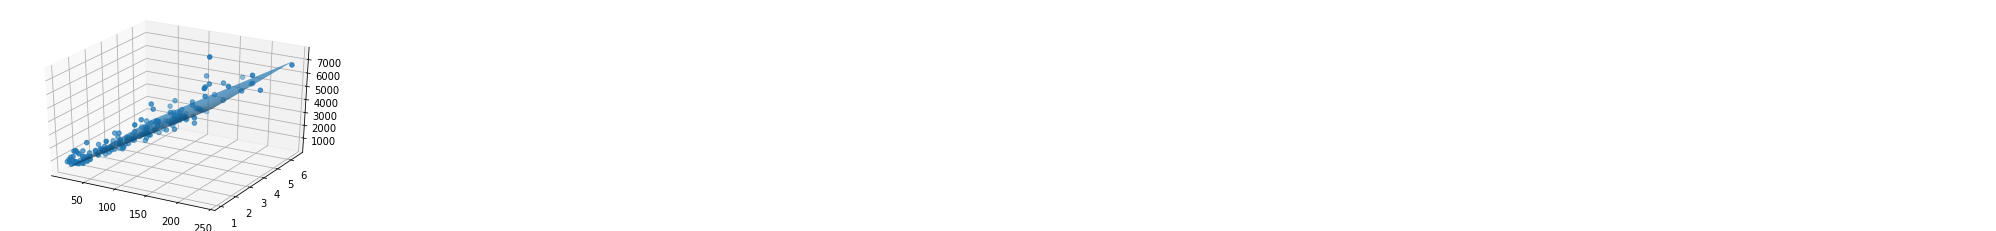

In [5]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,1],X[:,2],Y)

x_plot = np.linspace(min(X[:,1]),max(X[:,1]))
y_plot = np.linspace(min(X[:,2]),max(X[:,2]))

xx, yy = np.meshgrid(x_plot,y_plot)

z_plot = theta[0] + theta[1] * xx + theta[2] * (yy ** 2)

ax.plot_surface(xx,yy,z_plot)

avec normalisation des axes

In [228]:
X = data.iloc[:, 0:2].values.reshape((-1,2))
temp_X = np.ones((X.shape[0],X.shape[1]+1))
temp_X[:,1:] = X
X = temp_X

X[:,1] = (X[:,1] - np.average(X[:,1]))/(max(X[:,1])-min(X[:,1]))
X[:,2] = (X[:,2] - np.average(X[:,2]))/(max(X[:,2])-min(X[:,2]))

In [229]:
theta = gradientDescent(X,Y,learning_rate=50,num_epoch=100)
print(theta)

[2378.24378109 2219.58249866 2203.02331934]


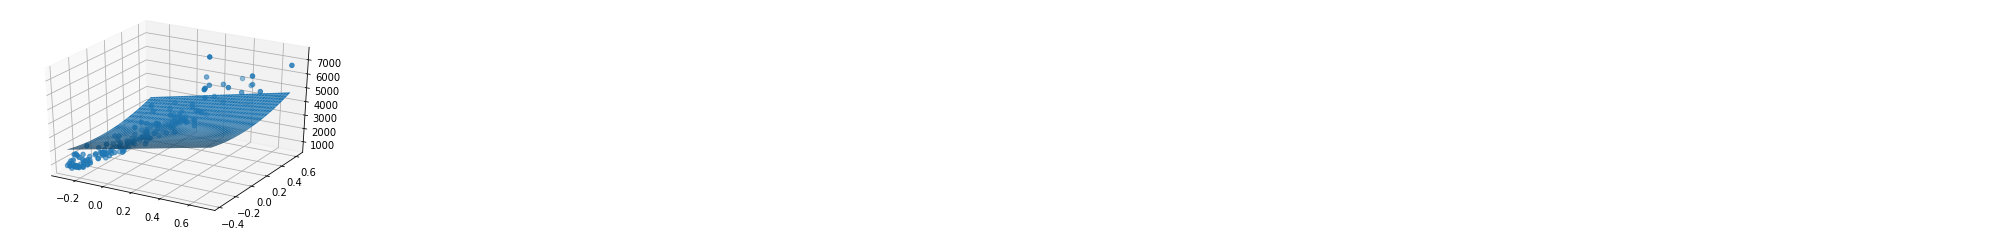

In [230]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,1],X[:,2],Y)

x_plot = np.linspace(min(X[:,1]),max(X[:,1]))
y_plot = np.linspace(min(X[:,2]),max(X[:,2]))

xx, yy = np.meshgrid(x_plot,y_plot)

z_plot = theta[0] + theta[1] * xx + theta[2] * (yy ** 2)

ax.plot_surface(xx,yy,z_plot)

## Exercice 2

In [241]:
train_set = pd.read_excel('overfitting.xlsx',sheet_name='train_set')
cv_set = pd.read_excel('overfitting.xlsx',sheet_name='cv_set')

X_train = train_set.iloc[:, 0].values.reshape((-1,1))
Y_train = train_set.iloc[:, 1].values

X_cv = cv_set.iloc[:, 0].values.reshape((-1,1))
Y_cv = cv_set.iloc[:, 1].values

In [242]:
def hypotesis(theta,X):
    sum = 0
    for i in range(X.shape[0]):
        sum += theta[i] * (X[i])
    return sum

def cost_fun(theta,X,Y):
    N = X.shape[0]
    temp = np.sum([(hypotesis(theta,X[i]) - Y[i])**2 for i in range(N)])
    return 1.0/2 * temp
            
    

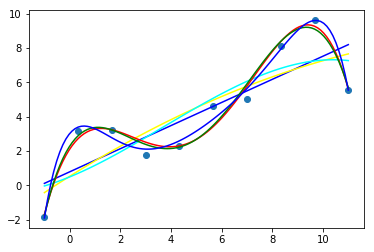

In [250]:
plt.scatter(x=X_train,y=Y_train)

x_plot = X_train.reshape(-1)
x_plot = np.linspace(min(X_train), max(X_train), 100)

def base_function(x,i):
    return x ** range(i)

colors = ['red','green','blue','yellow','cyan']

train_cost = []
cv_cost = []


for i in range(2,8):
    
    sub_X = base_function(X_train,i)
    
    p1 = np.linalg.inv(np.dot(sub_X.T,sub_X))
    p2 = np.dot(p1,sub_X.T)
    theta = np.dot(p2,Y_train)
    
    train_cost.append(cost_fun(theta,sub_X,Y_train))
    
    plt.plot(x_plot,
             [hypotesis(theta,base_function(x_plot[j],i)) for j in range(x_plot.shape[0])],
             c=colors[i%len(colors)])

    sub_X_cv = base_function(X_cv,i)
    
    cv_cost.append(cost_fun(theta,sub_X_cv,Y_train))
    
plt.show()

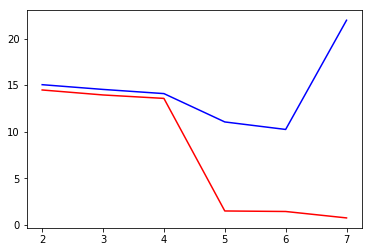

In [251]:
plt.plot(range(2,8),train_cost, c='red')
plt.plot(range(2,8),cv_cost, c='blue')